#### 使用如下公式计算置信区间

$$
CI_{upper} = p + z \times \sqrt{\frac{p(1 - p)}{n}} 
$$

$$ z = 1.65 $$

计算得 $$ CI = 0.15 $$




Current Solution: [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
Iteration 0: Current Cost = 81
Current Solution: [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
Iteration 30: Current Cost = 59
Current Solution: [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
Iteration 60: Current Cost = 59
Current Solution: [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
Iteration 90: Current Cost = 51
Current Solution: [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
Iteration 120: Current Cost = 33
Current Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Iteration 150: Current Cost = 26
Current Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Iteration 180: Current Cost = 26
Best Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Minimum Cost: 26
CI = 0.15025963517411414


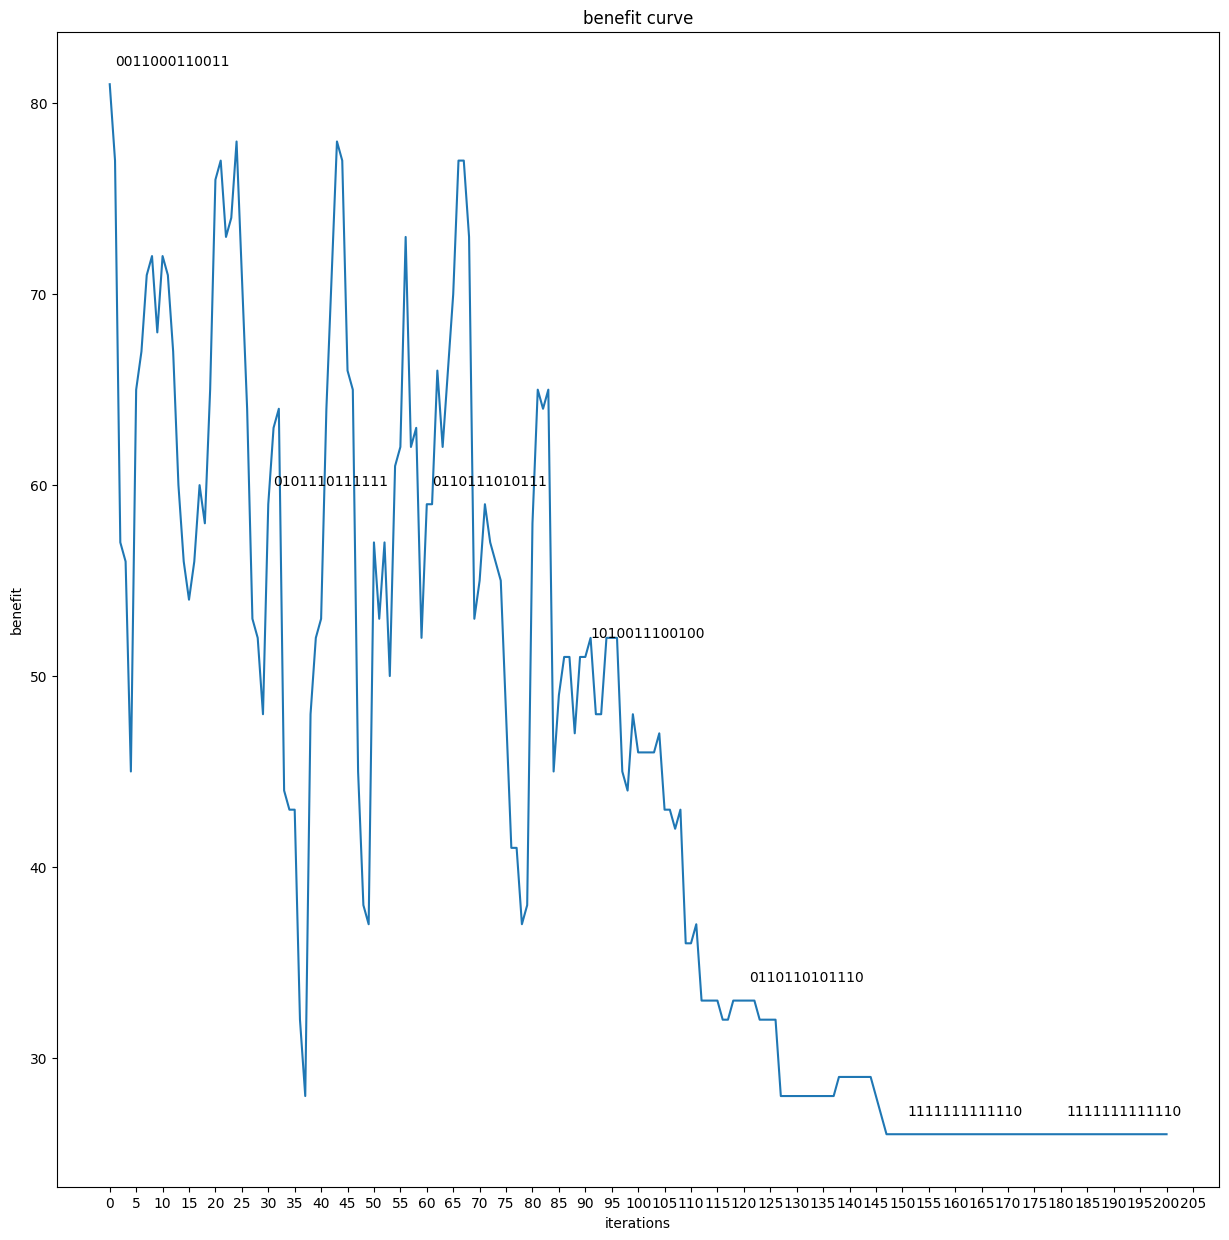

In [4]:


import random
import math
import matplotlib.pyplot as plt
import numpy as np

p = 0.1
z = 1.65
n = 97
CI_u = p + z * np.sqrt(p * (1 - p) / n)

rd = np.random.normal
sigma = 0.015

comps = [
    {"defect_rate": rd(p,sigma), "purchase_cost": 2, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 8, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 12, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 2, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 8, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 12, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 2, "inspection_cost": 1},
    {"defect_rate": rd(p,sigma), "purchase_cost": 8, "inspection_cost": 1}
]

semip = [
    {"defect_rate": rd(p,sigma), "assembly_cost": 8, "inspection_cost": 4},
    {"defect_rate": rd(p,sigma), "assembly_cost": 8, "inspection_cost": 4},
    {"defect_rate": rd(p,sigma), "assembly_cost": 8, "inspection_cost": 4}
]

final = {
    "defect_rate": rd(p,sigma), "assembly_cost": 8, "inspection_cost": 6,
    "market_price": 200, "replacement_cost": 40, "disassembly_cost": 20
}
def cacc(comps, semip, final, dec):
    comp_d = dec[:8]
    semip_d = dec[8:11]
    final_d = dec[11]
    dis_d = dec[12]

    component_c = sum(d * comp["inspection_cost"] + (1 - d) * comp["purchase_cost"] for d, comp in zip(comp_d, comps))
    semip_c = sum(d * semi["inspection_cost"] + (1 - d) * semi["assembly_cost"] for d, semi in zip(semip_d, semip))
    final_c = final_d * final["inspection_cost"] + (1 - final_d) * final["assembly_cost"]
    dis_c = dis_d * final["disassembly_cost"]

    total_cost = component_c + semip_c + final_c + dis_c
    return total_cost

def init():
    return [random.choice([0, 1]) for _ in range(13)]

# 生成邻域解
def shllf(solution):
    new = solution[:]
    index = random.randint(0, len(solution) - 1)
    new[index] = 1 - new[index]
    return new
def to_str(a) -> str:
    s: str = ""
    for v in a:
        s += str(v)
    return s

def SA(comps, semip, final, init_tmp, cooling_rate, mit,cx,cy,ex,ey):
    solution_c = init()
    cost_c = cacc(comps, semip, final, solution_c)
    solution_b = solution_c
    cost_b = cost_c
    temp = init_tmp

    for i in range(mit):
        new_solution = shllf(solution_c)
        new_cost = cacc(comps, semip, final, new_solution)

        if new_cost < cost_c or random.random() < math.exp((cost_c - new_cost) / temp):
            solution_c = new_solution
            cost_c = new_cost


        if new_cost < cost_b:
            solution_b = new_solution
            cost_b = new_cost


        temp *= cooling_rate

        cx.append(i)
        cy.append(cost_c)

        ex.append(i)
        ey.append(to_str(solution_c))

        if i % 30 == 0:

            plt.annotate(to_str(solution_c),xy = (i,cost_c),xytext = (i + 1,cost_c + 1),
                         )

            print(f"Current Solution: {solution_c}")
            print(f"Iteration {i}: Current Cost = {cost_c}")

    return solution_b, cost_b

def main():
    init_tmp: float = 1000.
    cooling_rate: float = 0.95
    mit: int = 200 + 1

    cx = []
    cy = []

    ex = []
    ey = []

    plt.figure(figsize = (15,15))
    plt.title("benefit curve")
    plt.xlabel("iterations")
    plt.ylabel("benefit")

    solution_b, cost_b = SA(comps, semip, final, init_tmp, cooling_rate, mit,cx,cy,ex,ey)

    print(f"Best Solution: {solution_b}")
    print(f"Minimum Cost: {cost_b}")

    plt.xticks([v for v in range(0,mit + 5,5)])
    plt.yticks([v for v in range(0,100 + 10,10)])
    plt.plot(cx,cy)

    # plt.figure(figsize = (15,15))
    # plt.title("state iteration curve")
    # plt.xlabel("iterations")
    # plt.ylabel("state")
    # plt.xticks([v for v in range(0,mit + 5,5)])
    # plt.plot(ex,ey,color = "#B8860B")

#    plt.show()

    print("CI =",CI_u)
    



if __name__ == "__main__":
    main()
